## Import Required Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from tld import get_tld, is_tld
from urllib.parse import urlparse
import re

### Load and Pre-process First Data

In [64]:
data2 = pd.read_csv("dataset_phishing.csv")
data2 = data2[["url", "status"]]

data2.columns = ["url", "type"]
data2["type"].value_counts()

legitimate    5715
phishing      5715
Name: type, dtype: int64

In [65]:
arr = []
for i in data2["type"].values:
    if i == "legitimate":
        arr.append("benign")
    else:
        arr.append("phishing")
        
data2["type"] = arr

In [66]:
df = data2.copy()
df.head()

,url,type
0,http://www.crestonwood.com/router.php,benign
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,benign
4,http://www.iracing.com/tracks/gateway-motorspo...,benign


In [67]:
df.columns

Index(['url', 'type'], dtype='object')

### Pre-processing Functions

In [68]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0  

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits 


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
    
  
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0   

### Apply Pre-Processing Functions To First DataFrame

In [69]:
df["url"] = df['url'].replace('www.', '', regex=True)
df['url_len'] = df['url'].apply(lambda x: len(str(x)))
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df['https'] = df['url'].apply(lambda i: httpSecure(i))
df['digits']= df['url'].apply(lambda i: digit_count(i))
df['letters']= df['url'].apply(lambda i: letter_count(i))
df['Shortining_Service'] = df['url'].apply(lambda x: Shortining_Service(x))
df['having_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))

df.head()

,url,type,url_len,@,?,-,=,.,#,%,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,http://crestonwood.com/router.php,benign,33,0,0,0,0,2,0,0,...,0,0,0,1,1,0,0,27,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,0,0,0,0,1,0,0,...,0,0,0,1,1,0,17,53,0,0
2,https://support-appleld.com.secureupdate.duila...,phishing,126,0,1,1,3,4,0,0,...,0,0,0,1,1,1,19,88,0,0
3,http://rgipt.ac.in,benign,18,0,0,0,0,2,0,0,...,0,0,0,1,1,0,0,13,0,0
4,http://iracing.com/tracks/gateway-motorsports-...,benign,51,0,0,2,0,1,0,0,...,0,0,0,1,1,0,0,42,0,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 11430 non-null  object
 1   type                11430 non-null  object
 2   url_len             11430 non-null  int64 
 3   @                   11430 non-null  int64 
 4   ?                   11430 non-null  int64 
 5   -                   11430 non-null  int64 
 6   =                   11430 non-null  int64 
 7   .                   11430 non-null  int64 
 8   #                   11430 non-null  int64 
 9   %                   11430 non-null  int64 
 10  +                   11430 non-null  int64 
 11  $                   11430 non-null  int64 
 12  !                   11430 non-null  int64 
 13  *                   11430 non-null  int64 
 14  ,                   11430 non-null  int64 
 15  //                  11430 non-null  int64 
 16  abnormal_url        11

In [71]:
df.shape

(11430, 22)

In [72]:
df.describe()

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,59.326859,0.022222,0.141207,0.996850,0.293176,2.037620,0.004374,0.123097,0.010499,0.001925,0.002450,0.000700,0.004024,1.009011,0.998338,0.389064,5.448906,44.349694,0.123447,0.008924
std,55.486497,0.155500,0.364456,2.086876,0.998317,1.429469,0.065998,1.466450,0.201651,0.077111,0.059109,0.026448,0.103240,0.132309,0.040739,0.487559,16.316854,38.935630,0.328964,0.094048
min,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,36.000000,0.000000,0.000000
75%,70.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,53.000000,0.000000,0.000000
max,1641.000000,4.000000,3.000000,43.000000,19.000000,23.000000,1.000000,96.000000,12.000000,6.000000,3.000000,1.000000,4.000000,5.000000,1.000000,1.000000,679.000000,1301.000000,1.000000,1.000000


### Load and Pre-process Second Data

In [73]:
data_df = pd.read_csv("malicious_phish.csv")
df2 = data_df.copy()
df2.columns

Index(['url', 'type'], dtype='object')

In [74]:
df2.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


### Apply Pre-Processing Function To Second DataFrame

In [75]:
df2["url"] = df2['url'].replace('www.', '', regex=True)
df2['url_len'] = df2['url'].apply(lambda x: len(str(x)))
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df2[a] = df2['url'].apply(lambda i: i.count(a))
df2['abnormal_url'] = df2['url'].apply(lambda i: abnormal_url(i))
df2['https'] = df2['url'].apply(lambda i: httpSecure(i))
df2['digits']= df2['url'].apply(lambda i: digit_count(i))
df2['letters']= df2['url'].apply(lambda i: letter_count(i))
df2['Shortining_Service'] = df2['url'].apply(lambda x: Shortining_Service(x))
df2['having_ip_address'] = df2['url'].apply(lambda i: having_ip_address(i))

In [76]:
df2.head()

,url,type,url_len,@,?,-,=,.,#,%,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,84,0,1,1,4,2,0,0,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,1,3,2,0,0,...,0,0,0,1,1,0,22,199,0,0


### Join Both Datasets (df and df2)

In [77]:
df3 = df.append(df2)
df3.shape

(662621, 22)

In [85]:
df3.columns

Index(['url', 'type', 'url_len', '@', '?', '-', '=', '.', '#', '%', '+', '$',
       '!', '*', ',', '//', 'abnormal_url', 'https', 'digits', 'letters',
       'Shortining_Service', 'having_ip_address'],
      dtype='object')

In [78]:
df3["type"].unique()

array(['benign', 'phishing', 'defacement', 'malware'], dtype=object)

In [87]:
one_hot_encoded_data = pd.get_dummies(df3, columns = ["type"])
hot_coder = one_hot_encoded_data[["type_benign"]]
hot_coder.columns = ["target"]
new_df3 = df3.drop("type", axis=1)
df_data = pd.concat([new_df3, hot_coder], axis=1)
df_data.head()

,url,url_len,@,?,-,=,.,#,%,+,...,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,target
0,http://crestonwood.com/router.php,33,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,27,0,0,1
1,http://shadetreetechnology.com/V4/validation/a...,77,0,0,0,0,1,0,0,0,...,0,0,1,1,0,17,53,0,0,0
2,https://support-appleld.com.secureupdate.duila...,126,0,1,1,3,4,0,0,0,...,0,0,1,1,1,19,88,0,0,0
3,http://rgipt.ac.in,18,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,13,0,0,1
4,http://iracing.com/tracks/gateway-motorsports-...,51,0,0,2,0,1,0,0,0,...,0,0,1,1,0,0,42,0,0,1


In [88]:
df_data.isna().sum()

url                   0
url_len               0
@                     0
?                     0
-                     0
=                     0
.                     0
#                     0
%                     0
+                     0
$                     0
!                     0
*                     0
,                     0
//                    0
abnormal_url          0
https                 0
digits                0
letters               0
Shortining_Service    0
having_ip_address     0
target                0
dtype: int64

### Storing Clean Data A New Data Frame

In [89]:
#df_data.to_csv("comprehensive_phishing_data.csv", index=False)

In [170]:
df_r = pd.read_csv("comprehensive_phishing_data.csv")
df_r.columns

Index(['url', 'url_len', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*',
       ',', '//', 'abnormal_url', 'https', 'digits', 'letters',
       'Shortining_Service', 'having_ip_address', 'target'],
      dtype='object')

### Data Cleaning

In [90]:
df = pd.read_csv("comprehensive_phishing_data.csv")
print("No missing values was found")
tmp = df.isnull().sum().reset_index(name='missing_val')
tmp[tmp['missing_val']!= 0]

No missing values was found


,index,missing_val


### Identify Categorical Columns

In [97]:
df_numeric = df.select_dtypes(include=['int64','float64'])
num_cols = np.array(df_numeric.columns)
num_cols

array(['url_len', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*',
       ',', '//', 'abnormal_url', 'https', 'digits', 'letters',
       'Shortining_Service', 'having_ip_address', 'target'], dtype=object)

### Plot correlations of numerical columns

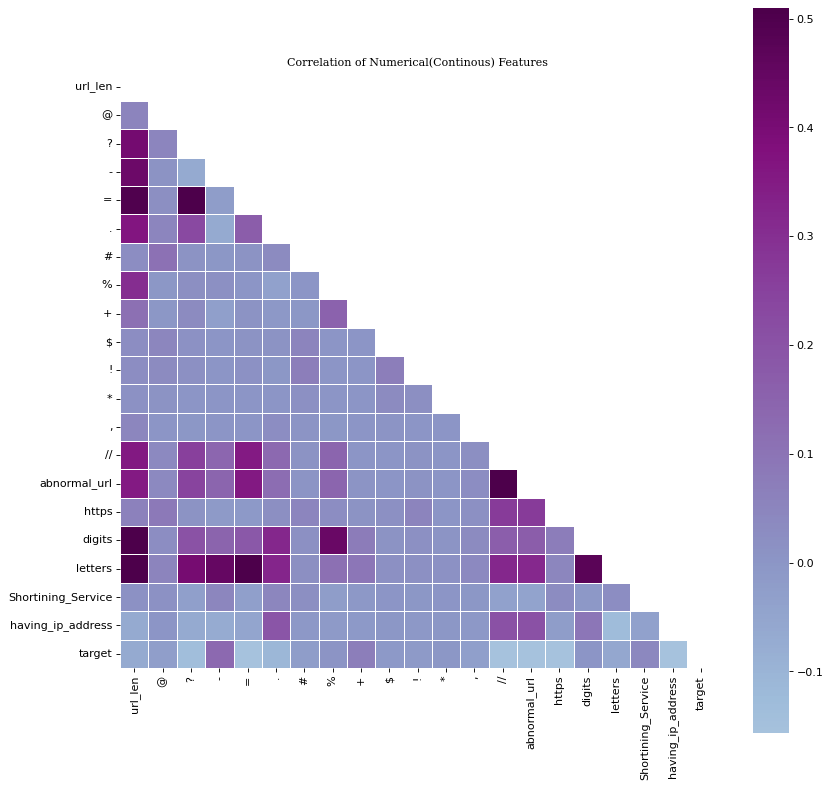

In [98]:
corr = df[num_cols].corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

In [156]:
df.head()

,url,url_len,@,?,-,=,.,#,%,+,...,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,target
0,http://crestonwood.com/router.php,33,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,27,0,0,1
1,http://shadetreetechnology.com/V4/validation/a...,77,0,0,0,0,1,0,0,0,...,0,0,1,1,0,17,53,0,0,0
2,https://support-appleld.com.secureupdate.duila...,126,0,1,1,3,4,0,0,0,...,0,0,1,1,1,19,88,0,0,0
3,http://rgipt.ac.in,18,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,13,0,0,1
4,http://iracing.com/tracks/gateway-motorsports-...,51,0,0,2,0,1,0,0,0,...,0,0,1,1,0,0,42,0,0,1


### Distribution of mean values accross target variables

In [157]:
df_distr =df.groupby('target')[num_cols].mean()
type(df_distr)

pandas.core.frame.DataFrame

In [158]:
df_distr = df_distr.drop("target", axis=1)
distr_df = df_distr.reset_index().T
new_distr = distr_df.reset_index()
new_distr.columns = ["parameters", "0_label", "1_label"]
#type(distr_df)
# distr_df = distr_df.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)
# distr_df

In [150]:
new_distr.head()

,parameters,0_abel,1_label
0,target,0.000000,1.000000
1,url_len,63.242178,57.335558
2,@,0.004475,0.001556
3,?,0.304856,0.178847
4,-,0.990796,1.830074


### Distribution Of Variables With Respect To Target

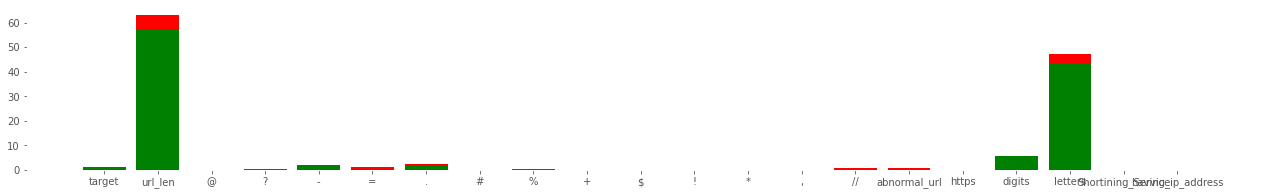

In [165]:
plt. figure(figsize=(22,3))
plt.bar(new_distr["parameters"], new_distr["0_label"], color='r')
plt.bar(new_distr["parameters"], new_distr["1_label"], color='g')
plt.show()